In [1]:
using Distributions
using Random
using StatsPlots
default(fmt=:png, size=(500, 300),
    titlefontsize=10, tickfontsize=6, guidefontsize=10)

distname(dist) = replace(string(dist), r"{[^}]*}"=>"")

function distname(dist::LocationScale)
    μ, σ, ρ = params(dist)
    if μ == 0
        "$σ * $(distname(ρ))"
    else
        "$μ + $σ * $(distname(ρ))"
    end
end

function plot_mean_and_var(; dist = Normal(10, 2), n = 20, L = 10^6, M = 10^4,
        binX̄=:auto, binS²=:auto, xlimX̄=:auto, xlimS²=:auto, kwargs...)
    X̄ = Vector{Float64}(undef, L)
    S² = Vector{Float64}(undef, L)
    tmpX = [Vector{Float64}(undef, n) for _ in 1:Threads.nthreads()]
    Threads.@threads for i in 1:L
        X = rand!(dist, tmpX[Threads.threadid()])
        X̄[i] = mean(X)
        S²[i] = var(X)
    end
    
    @show μ = mean(dist)
    @show σ² = var(dist)
    @show κ₃ = skewness(dist)
    @show κ₄ = kurtosis(dist)
    @show varS² = σ²^2*(κ₄/n + 2/(n-1))
    @show a = varS²/(2σ²)
    @show ν = 2σ²^2/varS²
    @show normal = Normal(μ, √(σ²/n))
    achisqν = a*Chisq(ν)
    println("achisqν = a * Chisq(ν) = ", distname(achisqν))
    @show normalS² = Normal(σ², √varS²)
    
    P1 = scatter(X̄[1:M], S²[1:M]; label="", ms=1, msw=0, alpha=0.5)
    plot!(xguide="\$\\overline{X}\$", yguide="\$S^2\$", yscale=:log10)
    title!("$(distname(dist)), n=$n")
    plot!(; kwargs...)
    P2 = stephist(X̄; norm=true, bin=binX̄, xlim=xlimX̄, 
        label="", title="\$\\overline{X}\$")
    plot!(normal, quantile.(Ref(X̄), (0.000005, 0.999995))...; label="", ls=:dash)
    P3 = stephist(S²; norm=true, bin=binS², xlim=xlimS², 
        label="", title="\$S^2\$")
    xmax = min(quantile(S², ν ≤ 2 ? 0.999 : 0.99995))
    if binS² != :auto
        xmax = min(last(binS²), xmax)
    end
    if xlimS² != :auto
        xmax = min(last(xlimS²), xmax)
    end
    xmin = max(quantile(S², 0.000005), xmax/200)
    plot!(normalS², xmin, xmax; label="", ls=:dash)
    plot!(achisqν, xmin, xmax; label="", ls=:dashdot)
    
    layout = @layout [a [b; c]]
    plot(P1, P2, P3; layout, size=(800, 400))
    plot!(leftmargin=4Plots.mm)
end

plot_mean_and_var (generic function with 1 method)

μ = mean(dist) = 10.0
σ² = var(dist) = 4.0
κ₃ = skewness(dist) = 0.0
κ₄ = kurtosis(dist) = 0.0
varS² = σ² ^ 2 * (κ₄ / n + 2 / (n - 1)) = 1.6842105263157894
a = varS² / (2σ²) = 0.21052631578947367
ν = (2 * σ² ^ 2) / varS² = 19.0
normal = Normal(μ, √(σ² / n)) = Normal{Float64}(μ=10.0, σ=0.4472135954999579)
achisqν = a * Chisq(ν) = 0.21052631578947367 * Chisq(ν=19.0)
normalS² = Normal(σ², √varS²) = Normal{Float64}(μ=4.0, σ=1.2977713690461004)


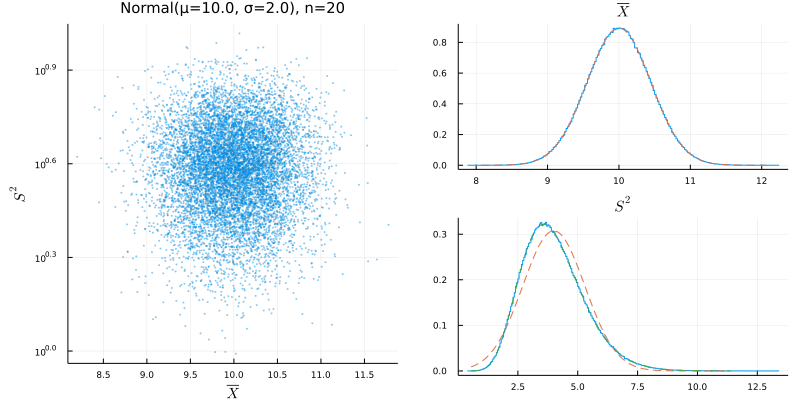

In [2]:
plot_mean_and_var(dist = Normal(10, 2), n = 20)

μ = mean(dist) = 0.5
σ² = var(dist) = 0.08333333333333333
κ₃ = skewness(dist) = 0.0
κ₄ = kurtosis(dist) = -1.2
varS² = σ² ^ 2 * (κ₄ / n + 2 / (n - 1)) = 0.0003143274853801169
a = varS² / (2σ²) = 0.0018859649122807015
ν = (2 * σ² ^ 2) / varS² = 44.186046511627914
normal = Normal(μ, √(σ² / n)) = Normal{Float64}(μ=0.5, σ=0.06454972243679027)
achisqν = a * Chisq(ν) = 0.0018859649122807015 * Chisq(ν=44.186046511627914)
normalS² = Normal(σ², √varS²) = Normal{Float64}(μ=0.08333333333333333, σ=0.01772928327316468)


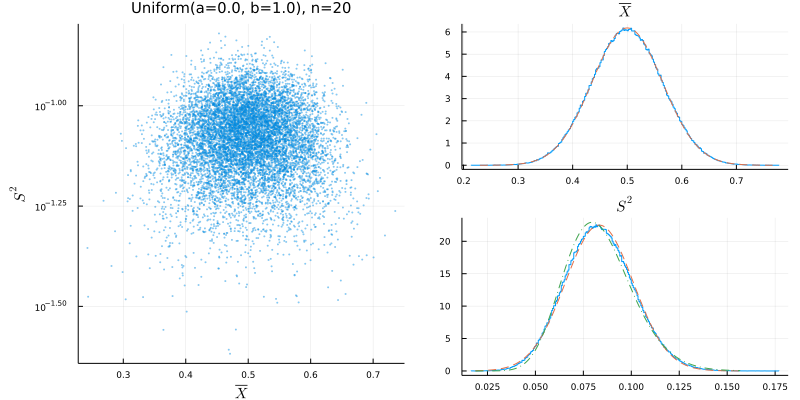

In [3]:
plot_mean_and_var(dist = Uniform(), n = 20)

μ = mean(dist) = 8.0
σ² = var(dist) = 16.0
κ₃ = skewness(dist) = 1.0
κ₄ = kurtosis(dist) = 1.5
varS² = σ² ^ 2 * (κ₄ / n + 2 / (n - 1)) = 46.14736842105263
a = varS² / (2σ²) = 1.4421052631578948
ν = (2 * σ² ^ 2) / varS² = 11.094890510948904
normal = Normal(μ, √(σ² / n)) = Normal{Float64}(μ=8.0, σ=0.8944271909999159)
achisqν = a * Chisq(ν) = 1.4421052631578948 * Chisq(ν=11.094890510948904)
normalS² = Normal(σ², √varS²) = Normal{Float64}(μ=16.0, σ=6.79318543991349)


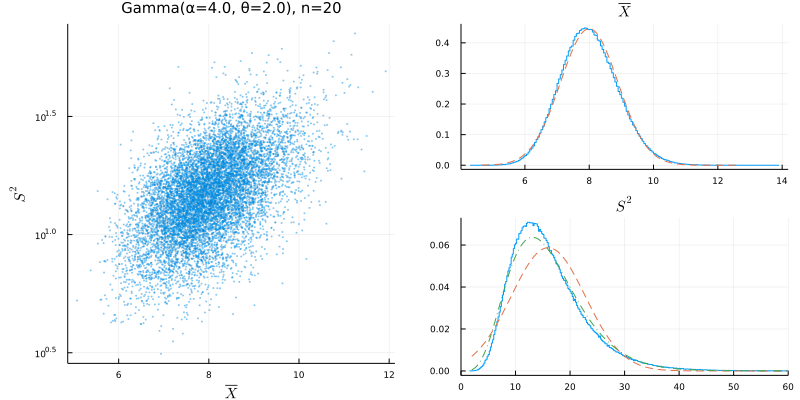

In [4]:
plot_mean_and_var(dist = Gamma(4, 2), n = 20, xlimS² = (0, 60))

μ = mean(dist) = 1.0
σ² = var(dist) = 1.0
κ₃ = skewness(dist) = 1.0
κ₄ = kurtosis(dist) = 1.0
varS² = σ² ^ 2 * (κ₄ / n + 2 / (n - 1)) = 0.15526315789473683
a = varS² / (2σ²) = 0.07763157894736841
ν = (2 * σ² ^ 2) / varS² = 12.881355932203391
normal = Normal(μ, √(σ² / n)) = Normal{Float64}(μ=1.0, σ=0.22360679774997896)
achisqν = a * Chisq(ν) = 0.07763157894736841 * Chisq(ν=12.881355932203391)
normalS² = Normal(σ², √varS²) = Normal{Float64}(μ=1.0, σ=0.39403446282620613)


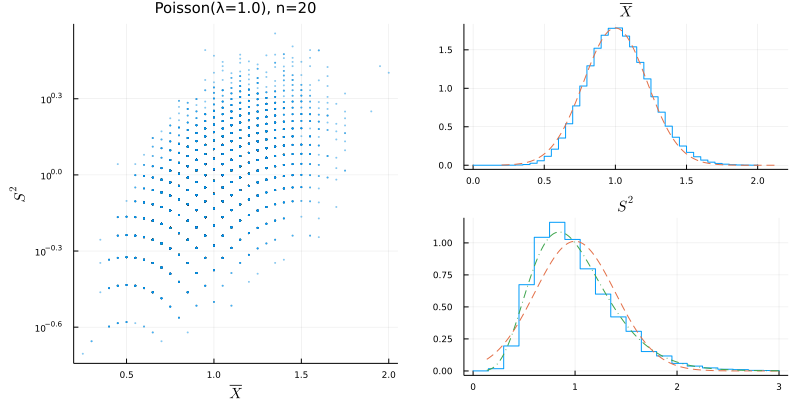

In [5]:
plot_mean_and_var(dist = Poisson(1), n = 20, binX̄=0:0.05:2, binS²=0:0.15:3)

μ = mean(dist) = 1.0
σ² = var(dist) = 1.0
κ₃ = skewness(dist) = 1.0
κ₄ = kurtosis(dist) = 1.0
varS² = σ² ^ 2 * (κ₄ / n + 2 / (n - 1)) = 0.030202020202020202
a = varS² / (2σ²) = 0.015101010101010101
ν = (2 * σ² ^ 2) / varS² = 66.22073578595318
normal = Normal(μ, √(σ² / n)) = Normal{Float64}(μ=1.0, σ=0.1)
achisqν = a * Chisq(ν) = 0.015101010101010101 * Chisq(ν=66.22073578595318)
normalS² = Normal(σ², √varS²) = Normal{Float64}(μ=1.0, σ=0.17378728435078386)


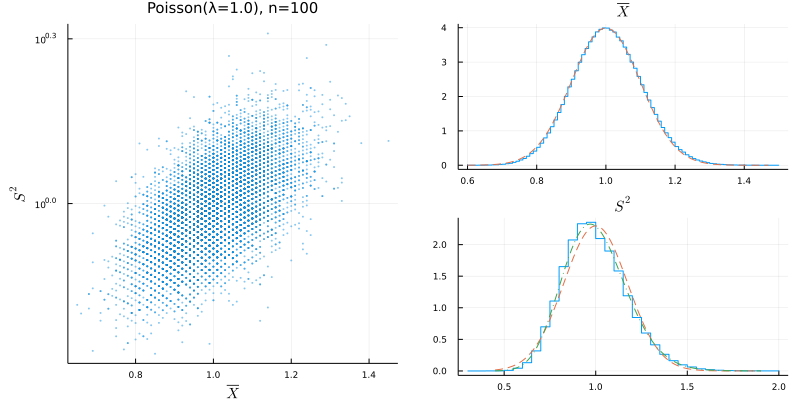

In [6]:
plot_mean_and_var(dist = Poisson(1), n = 100, binX̄=0.6:0.01:1.5, binS²=0.3:0.05:2)

μ = mean(dist) = 1.6487212707001282
σ² = var(dist) = 4.670774270471604
κ₃ = skewness(dist) = 6.184877138632554
κ₄ = kurtosis(dist) = 110.9363921763115
varS² = σ² ^ 2 * (κ₄ / n + 2 / (n - 1)) = 123.30658532827485
a = varS² / (2σ²) = 13.199801380663242
ν = (2 * σ² ^ 2) / varS² = 0.3538518600222237
normal = Normal(μ, √(σ² / n)) = Normal{Float64}(μ=1.6487212707001282, σ=0.48325843347383)
achisqν = a * Chisq(ν) = 13.199801380663242 * Chisq(ν=0.3538518600222237)
normalS² = Normal(σ², √varS²) = Normal{Float64}(μ=4.670774270471604, σ=11.104349838161388)


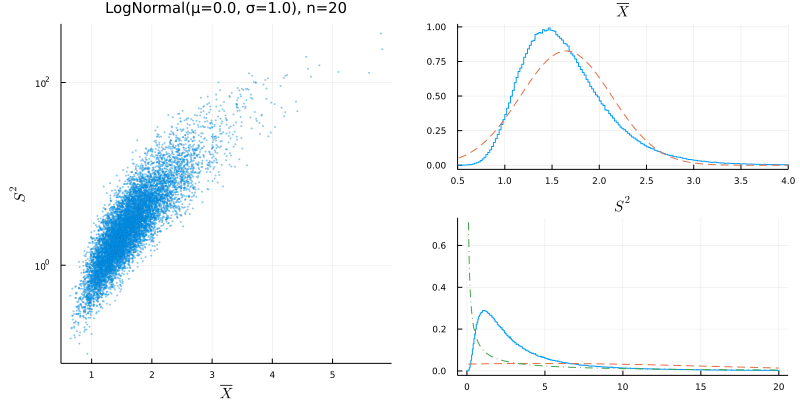

In [7]:
plot_mean_and_var(dist = LogNormal(), n = 20, xlimX̄=(0.5, 4), binS²=0:0.05:20)

μ = mean(dist) = 1.6487212707001282
σ² = var(dist) = 4.670774270471604
κ₃ = skewness(dist) = 6.184877138632554
κ₄ = kurtosis(dist) = 110.9363921763115
varS² = σ² ^ 2 * (κ₄ / n + 2 / (n - 1)) = 24.642760015332204
a = varS² / (2σ²) = 2.637973769265887
ν = (2 * σ² ^ 2) / varS² = 1.7705916278960643
normal = Normal(μ, √(σ² / n)) = Normal{Float64}(μ=1.6487212707001282, σ=0.21611974158950875)
achisqν = a * Chisq(ν) = 2.637973769265887 * Chisq(ν=1.7705916278960643)
normalS² = Normal(σ², √varS²) = Normal{Float64}(μ=4.670774270471604, σ=4.964147461078508)


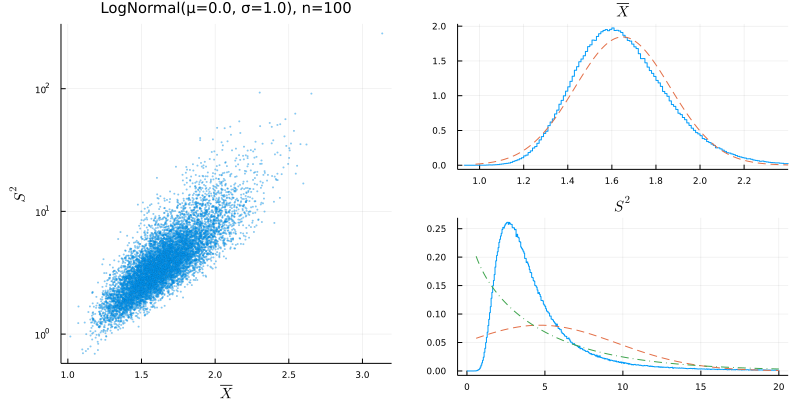

In [8]:
plot_mean_and_var(dist = LogNormal(), n = 100, xlimX̄=(0.9, 2.4), binS²=0:0.05:20)

μ = mean(dist) = 1.6487212707001282
σ² = var(dist) = 4.670774270471604
κ₃ = skewness(dist) = 6.184877138632554
κ₄ = kurtosis(dist) = 110.9363921763115
varS² = σ² ^ 2 * (κ₄ / n + 2 / (n - 1)) = 4.927845421992028
a = varS² / (2σ²) = 0.5275191153151646
ν = (2 * σ² ^ 2) / varS² = 8.854227524401775
normal = Normal(μ, √(σ² / n)) = Normal{Float64}(μ=1.6487212707001282, σ=0.09665168669476601)
achisqν = a * Chisq(ν) = 0.5275191153151646 * Chisq(ν=8.854227524401775)
normalS² = Normal(σ², √varS²) = Normal{Float64}(μ=4.670774270471604, σ=2.219875091529257)


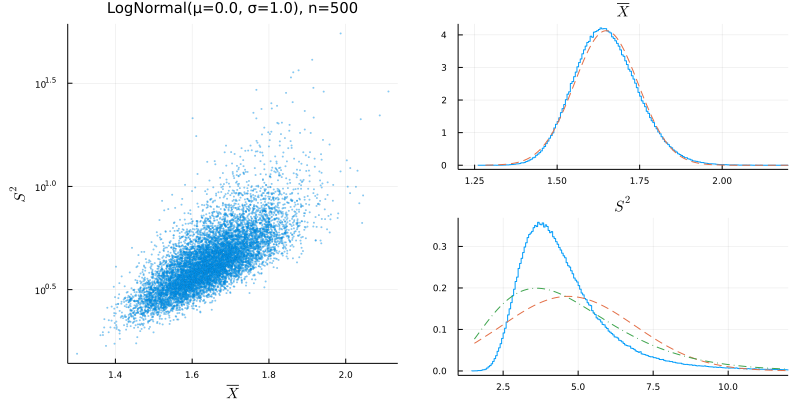

In [9]:
plot_mean_and_var(dist = LogNormal(), n = 500, xlimX̄=(1.2, 2.2), xlimS²=(1, 12))

μ = mean(dist) = 1.6487212707001282
σ² = var(dist) = 4.670774270471604
κ₃ = skewness(dist) = 6.184877138632554
κ₄ = kurtosis(dist) = 110.9363921763115
varS² = σ² ^ 2 * (κ₄ / n + 2 / (n - 1)) = 0.9855410925911358
a = varS² / (2σ²) = 0.10550082657833372
ν = (2 * σ² ^ 2) / varS² = 44.272395031934494
normal = Normal(μ, √(σ² / n)) = Normal{Float64}(μ=1.6487212707001282, σ=0.04322394831790175)
achisqν = a * Chisq(ν) = 0.10550082657833372 * Chisq(ν=44.272395031934494)
normalS² = Normal(σ², √varS²) = Normal{Float64}(μ=4.670774270471604, σ=0.9927442231466954)
  6.018031 seconds (110.88 k allocations: 95.925 MiB, 0.25% gc time)


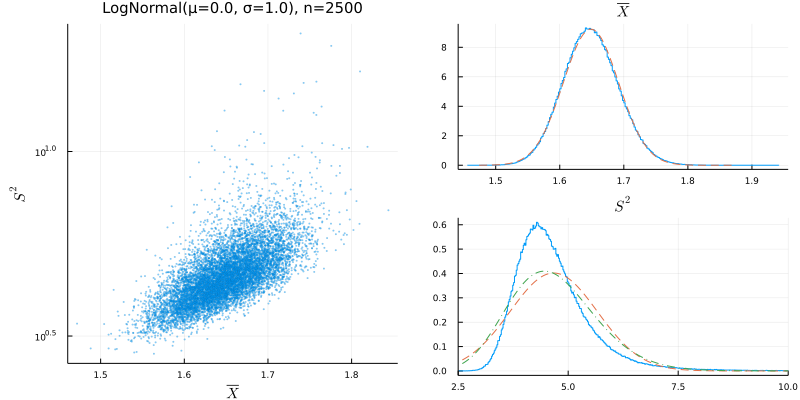

In [10]:
@time plot_mean_and_var(dist = LogNormal(), n = 2500, xlimS²=(2.5, 10))

μ = mean(dist) = 1.6487212707001282
σ² = var(dist) = 4.670774270471604
κ₃ = skewness(dist) = 6.184877138632554
κ₄ = kurtosis(dist) = 110.9363921763115
varS² = σ² ^ 2 * (κ₄ / n + 2 / (n - 1)) = 0.19710710099587914
a = varS² / (2σ²) = 0.02110004568642721
ν = (2 * σ² ^ 2) / varS² = 221.36323019793844
normal = Normal(μ, √(σ² / n)) = Normal{Float64}(μ=1.6487212707001282, σ=0.019330337338953202)
achisqν = a * Chisq(ν) = 0.02110004568642721 * Chisq(ν=221.36323019793844)
normalS² = Normal(σ², √varS²) = Normal{Float64}(μ=4.670774270471604, σ=0.443967454883665)
 30.569130 seconds (94.58 k allocations: 96.025 MiB)


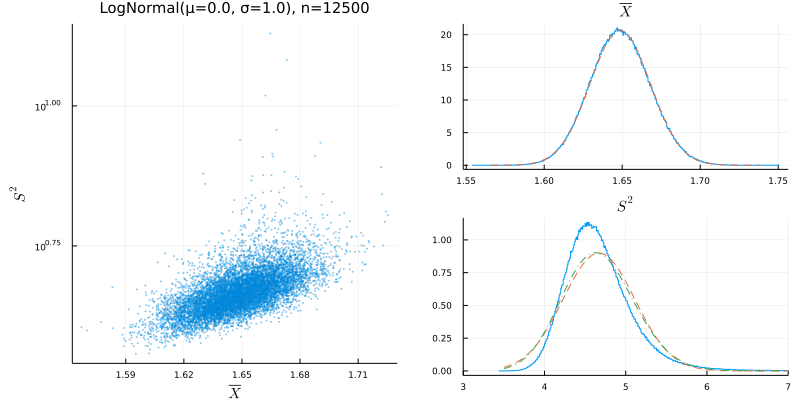

In [11]:
@time plot_mean_and_var(dist = LogNormal(), n = 12500, xlimS²=(3, 7))

μ = mean(dist) = 1.6487212707001282
σ² = var(dist) = 4.670774270471604
κ₃ = skewness(dist) = 6.184877138632554
κ₄ = kurtosis(dist) = 110.9363921763115
varS² = σ² ^ 2 * (κ₄ / n + 2 / (n - 1)) = 0.039421375515447325
a = varS² / (2σ²) = 0.0042200043539533955
ν = (2 * σ² ^ 2) / varS² = 1106.8174055545505
normal = Normal(μ, √(σ² / n)) = Normal{Float64}(μ=1.6487212707001282, σ=0.00864478966358035)
achisqν = a * Chisq(ν) = 0.0042200043539533955 * Chisq(ν=1106.8174055545505)
normalS² = Normal(σ², √varS²) = Normal{Float64}(μ=4.670774270471604, σ=0.19854816925735508)
164.209251 seconds (291.63 k allocations: 111.019 MiB, 0.01% gc time, 0.03% compilation time)


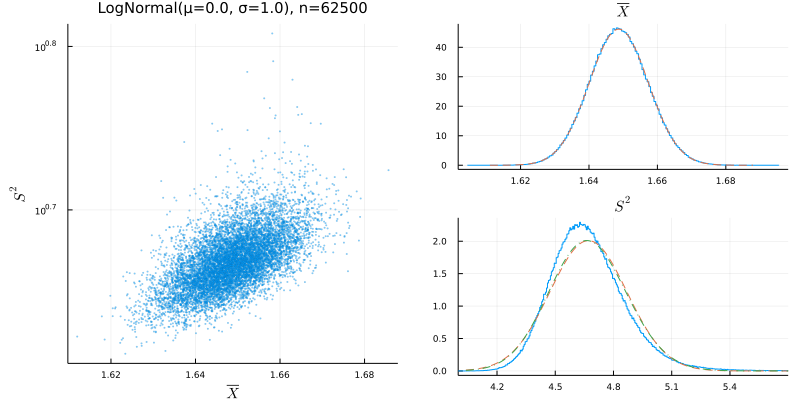

In [12]:
@time plot_mean_and_var(dist = LogNormal(), n = 62500, xlimS²=(4, 5.7))